In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

In [ ]:
zip_path = '/content/drive/MyDrive/Thesis/wow/archive (4).zip'

In [ ]:
extract_path = '/content/drive/MyDrive/Thesis/wow'
os.makedirs(extract_path, exist_ok=True)

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Proses ekstraksi selesai.")

Proses ekstraksi selesai.


In [ ]:
# Daftar berkas dalam direktori yang diekstrak
extracted_files = os.listdir(extract_path)
print("Berkas yang diekstrak:", extracted_files)

Berkas yang diekstrak: ['archive (4).zip', 'news.csv']


In [ ]:
pip install textblob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import re
import nltk
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
from wordcloud import WordCloud

In [ ]:
path = '/content/drive/MyDrive/Thesis/wow/news.csv'
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Mengganti nama kolom pertama menjadi 'ID'
df.columns = ['id'] + list(df.columns[1:])

# Menampilkan lima baris pertama setelah perubahan
print("\nSetelah perubahan:")
df.head(5)


Setelah perubahan:


,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Mengubah label menjadi numerik
df['label'] = df['label'].map({'FAKE': 1, 'REAL': 0})

# Menampilkan lima baris pertama setelah perubahan
print("\nSetelah perubahan:")
df.head(5)


Setelah perubahan:


,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [ ]:
df.to_csv('/content/drive/MyDrive/Thesis/wow/hoax_news_clean.csv', index=False)

**PRE PROCESSING**

DATA CLEANING

In [ ]:
print("Informasi awal tentang dataframe:")
print(df.info())

Informasi awal tentang dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 198.1+ KB
None


In [ ]:
print("\nJumlah missing values tiap kolom:")
print(df.isnull().sum())


Jumlah missing values tiap kolom:
id       0
title    0
text     0
label    0
dtype: int64


In [ ]:
print("\nJumlah tiap label:")
print(df['label'].value_counts())


Jumlah tiap label:
label
0    3171
1    3164
Name: count, dtype: int64


In [ ]:
print("\nJumlah data sebelum penanganan duplikat:", len(df))


Jumlah data sebelum penanganan duplikat: 6335


In [ ]:
df.drop_duplicates(inplace=True)
print("Jumlah data setelah penanganan duplikat:", len(df))

Jumlah data setelah penanganan duplikat: 6335


In [ ]:
# Simpan data yang telah dibersihkan
df.to_csv('/content/drive/MyDrive/Thesis/wow/hoax_news_fix.csv', index=False)
print("Data yang telah dibersihkan disimpan dalam file 'data_bersih.csv'")

Data yang telah dibersihkan disimpan dalam file 'data_bersih.csv'


In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

CASE FOLDING

In [ ]:
df['text_normalized'] = df['text'].apply(lambda x: x.lower())
print("Hasil Normalisasi:\n", df['text_normalized'].head())

Hasil Normalisasi:
 0    daniel greenfield, a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u.s. secretary of state john f. kerry said mon...
3    — kaydee king (@kaydeeking) november 9, 2016 t...
4    it's primary day in new york and front-runners...
Name: text_normalized, dtype: object


NORMALISASI

In [ ]:
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

df['text_cleaned'] = df['text_normalized'].apply(clean_text)
print("\nHasil Data Cleaning:\n", df['text_cleaned'].head())


Hasil Data Cleaning:
 0    daniel greenfield a shillman journalism fellow...
1    google pinterest digg linkedin reddit stumbleu...
2    us secretary of state john f kerry said monday...
3     kaydee king kaydeeking november   the lesson ...
4    its primary day in new york and frontrunners h...
Name: text_cleaned, dtype: object


TOKENISASI

In [ ]:
df['text_tokenized'] = df['text_cleaned'].apply(word_tokenize)
print("\nHasil Tokenisasi:\n", df['text_tokenized'].head())


Hasil Tokenisasi:
 0    [daniel, greenfield, a, shillman, journalism, ...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [us, secretary, of, state, john, f, kerry, sai...
3    [kaydee, king, kaydeeking, november, the, less...
4    [its, primary, day, in, new, york, and, frontr...
Name: text_tokenized, dtype: object


STOPWORD

In [ ]:
stop_words = set(stopwords.words('english'))
df['text_no_stopwords'] = df['text_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
print("\nHasil Stopword Removal:\n", df['text_no_stopwords'].head())


Hasil Stopword Removal:
 0    [daniel, greenfield, shillman, journalism, fel...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [us, secretary, state, john, f, kerry, said, m...
3    [kaydee, king, kaydeeking, november, lesson, t...
4    [primary, day, new, york, frontrunners, hillar...
Name: text_no_stopwords, dtype: object


LEMMATISASI

In [ ]:
lemmatizer = WordNetLemmatizer()
df['text_lemmatized'] = df['text_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print("\nHasil Lemmatisasi:\n", df['text_lemmatized'].head())


Hasil Lemmatisasi:
 0    [daniel, greenfield, shillman, journalism, fel...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [u, secretary, state, john, f, kerry, said, mo...
3    [kaydee, king, kaydeeking, november, lesson, t...
4    [primary, day, new, york, frontrunners, hillar...
Name: text_lemmatized, dtype: object


JOIN WORD

In [ ]:
def join_text(tokens):
    return ' '.join(tokens)

df['text_fix'] = df['text_lemmatized'].apply(join_text)
print("\nHasil Fix:\n", df['text_fix'].head())


Hasil Fix:
 0    daniel greenfield shillman journalism fellow f...
1    google pinterest digg linkedin reddit stumbleu...
2    u secretary state john f kerry said monday sto...
3    kaydee king kaydeeking november lesson tonight...
4    primary day new york frontrunners hillary clin...
Name: text_fix, dtype: object


In [ ]:
df[['text_fix']].to_csv('/content/drive/MyDrive/Thesis/wow/data_fix.csv', index=False)

In [ ]:
path = '/content/drive/MyDrive/Thesis/wow/data_fix.csv'
df = pd.read_csv(path)
df.head(5)

,text_fix
0,daniel greenfield shillman journalism fellow f...
1,google pinterest digg linkedin reddit stumbleu...
2,u secretary state john f kerry said monday sto...
3,kaydee king kaydeeking november lesson tonight...
4,primary day new york frontrunners hillary clin...


In [ ]:
hoax_news_clean_df = pd.read_csv('/content/drive/MyDrive/Thesis/wow/hoax_news_clean.csv')
data_fix_df = pd.read_csv('/content/drive/MyDrive/Thesis/wow/data_fix.csv')

hoax_news_clean_df['text_fix'] = data_fix_df['text_fix']

hoax_news_clean_df.to_csv('/content/drive/MyDrive/Thesis/wow/data_fix.csv', index=False)

In [ ]:
path = '/content/drive/MyDrive/Thesis/wow/data_fix.csv'
df = pd.read_csv(path)
df.head(5)

,id,title,text,label,text_fix
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,u secretary state john f kerry said monday sto...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,kaydee king kaydeeking november lesson tonight...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,primary day new york frontrunners hillary clin...


In [ ]:
columns = df.columns.tolist()
columns.insert(columns.index('text') + 1, columns.pop(columns.index('text_fix')))
df = df.reindex(columns=columns)

In [ ]:
df.head(5)

,id,title,text,text_fix,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,u secretary state john f kerry said monday sto...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king kaydeeking november lesson tonight...,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,primary day new york frontrunners hillary clin...,0


In [ ]:
df.to_csv('/content/drive/MyDrive/Thesis/wow/hoax_fix2.csv', index=False)

In [ ]:
path = '/content/drive/MyDrive/Thesis/wow/hoax_fix2.csv'
df = pd.read_csv(path)

In [ ]:
df.head(5)

,id,title,text,text_fix,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,u secretary state john f kerry said monday sto...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king kaydeeking november lesson tonight...,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,primary day new york frontrunners hillary clin...,0


**PEMODELAN NAIVE BAYES**

In [ ]:
X = df['text_fix'].astype(str)
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Melakukan prediksi pada data uji
y_pred = nb_classifier.predict(X_test_tfidf)

**EVALUASI MODEL NAIVE BAYES**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.8666140489344909

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       639
           1       0.85      0.89      0.87       628

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

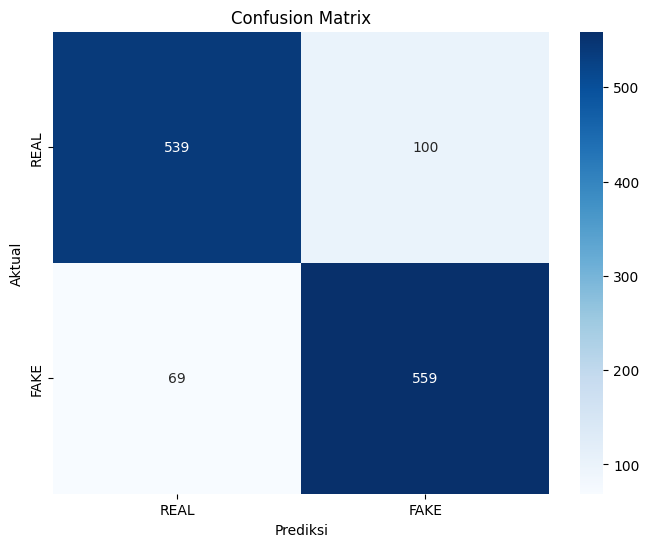

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_all_tfidf = tfidf_vectorizer.transform(df['text_fix'])

all_predictions = nb_classifier.predict(X_all_tfidf)

all_predictions_df = pd.DataFrame(all_predictions, columns=['label_bayes'])

result_df = pd.concat([df[['id', 'title', 'text', 'text_fix', 'label']], all_predictions_df], axis=1)

result_df.head(5)

,id,title,text,text_fix,label,label_bayes
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,1,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,1,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,u secretary state john f kerry said monday sto...,0,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king kaydeeking november lesson tonight...,1,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,primary day new york frontrunners hillary clin...,0,0


PREDIKSI MODEL NAIVE BAYES STATIS

In [ ]:
text = ["earth flat"]

text_tfidf = tfidf_vectorizer.transform(text)

prediction = nb_classifier.predict(text_tfidf)

if prediction[0] == 0:
    print("The text is predicted as REAL.")
else:
    print("The text is predicted as FAKE.")

The text is predicted as FAKE.


**VISUALISASI DATA**

VISUALISASI DIAGRAM BATANG PADA JUMLAH DATA FAKE & REAL

In [ ]:
df['text_fix'] = df['text_fix'].fillna('')

In [ ]:
fake_text = ' '.join(df[df['label'] == 1]['text_fix'])
real_text = ' '.join(df[df['label'] == 0]['text_fix'])

In [ ]:
fake_word_counts = Counter(fake_text.split())
fake_top_words = fake_word_counts.most_common(20)

In [ ]:
real_word_counts = Counter(real_text.split())
real_top_words = real_word_counts.most_common(20)

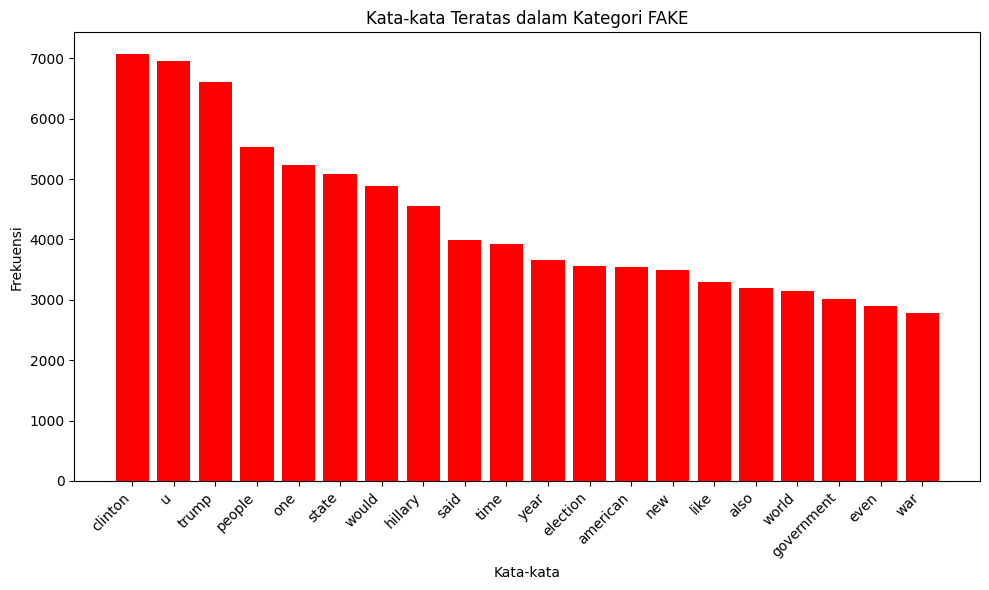

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in fake_top_words], [count[1] for count in fake_top_words], color='red')
plt.title('Kata-kata Teratas dalam Kategori FAKE')
plt.xlabel('Kata-kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

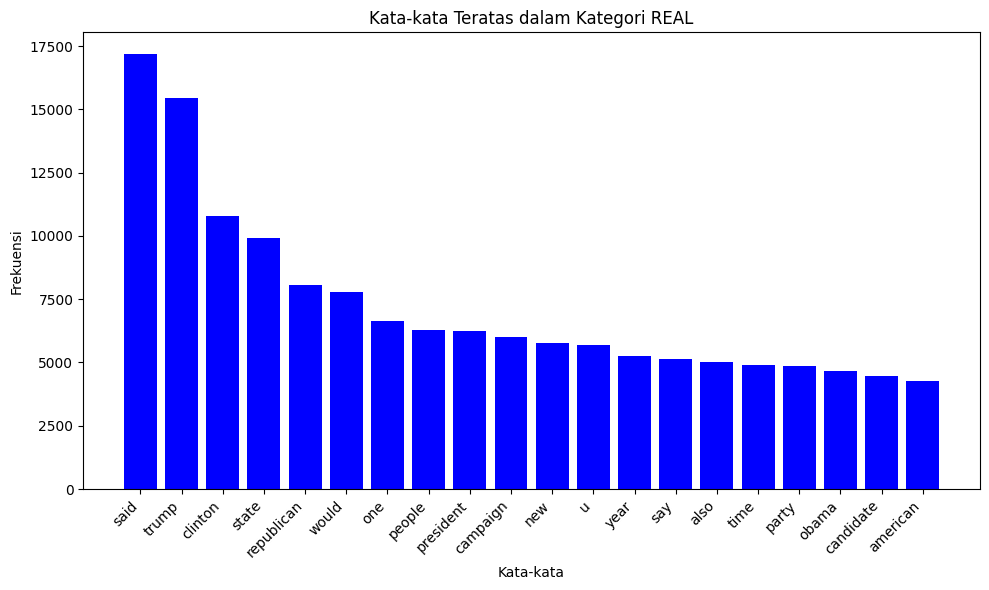

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in real_top_words], [count[1] for count in real_top_words], color='blue')
plt.title('Kata-kata Teratas dalam Kategori REAL')
plt.xlabel('Kata-kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

VISUALISASI WORD CLOUD PADA JUMLAH DATA FAKE & REAL

In [ ]:
fake_text = ' '.join(df[df['label'] == 1]['text_fix'])
real_text = ' '.join(df[df['label'] == 0]['text_fix'])

In [ ]:
wordcloud_fake = WordCloud(width=800, height=400, background_color ='white').generate(fake_text)
wordcloud_real = WordCloud(width=800, height=400, background_color ='white').generate(real_text)

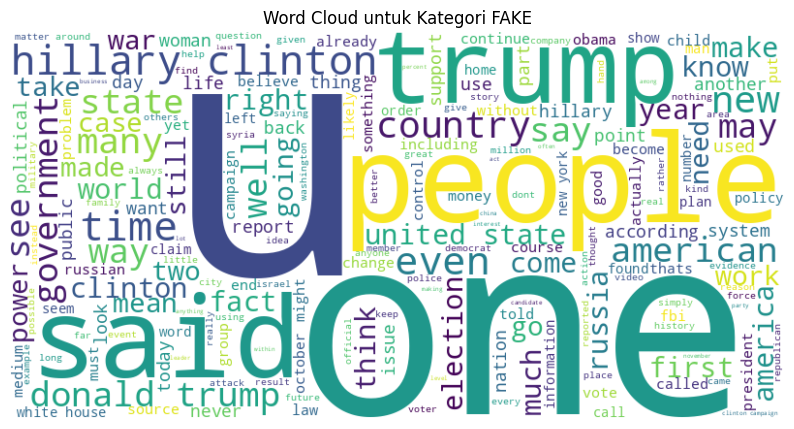

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud untuk Kategori FAKE')
plt.axis('off')
plt.show()

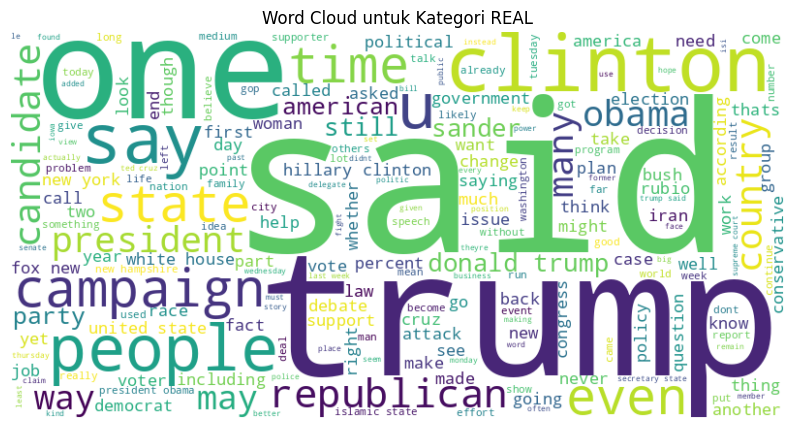

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud untuk Kategori REAL')
plt.axis('off')
plt.show()

**MENYIMPAN MODEL NAIVE BAYES**

In [ ]:
import pickle

model_path = 'naive_bayes_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(nb_classifier, file)
print("Model Naive Bayes telah disimpan di:", model_path)

Model Naive Bayes telah disimpan di: naive_bayes_model.pkl
